In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, confusion_matrix
from sklearn import metrics 
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from scipy import stats



In [266]:
index_df = pd.read_csv('datasets/sp-500-stocks/sp500_index.csv', parse_dates=['Date'])
print(index_df.shape)
index_df

(2517, 2)


,Date,S&P500
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57
...,...,...
2512,2024-12-16,6074.08
2513,2024-12-17,6050.61
2514,2024-12-18,5872.16
2515,2024-12-19,5867.08


In [267]:
companies_df = pd.read_csv('datasets/sp-500-stocks/sp500_companies.csv')
print(companies_df.shape)
companies_df.head()

(502, 16)


,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


In [224]:
stocks_df = pd.read_csv('datasets/sp-500-stocks/sp500_stocks.csv')
print(stocks_df.shape)
stocks_df.head()

(1891536, 8)


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,MMM,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,MMM,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,MMM,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,MMM,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
stocks_df = stocks_df[stocks_df['Close'].isnull() == False]
print(stocks_df.shape)
stocks_df.head()

(617831, 8)


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
3768,2010-01-04,AOS,5.937266,7.435000,7.480000,7.261667,7.295000,1104600.0
3769,2010-01-05,AOS,5.861404,7.340000,7.431667,7.308333,7.431667,1207200.0
3770,2010-01-06,AOS,5.864068,7.343333,7.405000,7.301667,7.335000,663000.0
3771,2010-01-07,AOS,5.881369,7.365000,7.425000,7.311667,7.356667,564000.0
3772,2010-01-08,AOS,5.967879,7.473333,7.485000,7.311667,7.331667,504600.0


In [226]:
stocks = stocks_df.merge(companies_df, on='Symbol', how='left')
print(stocks.shape)
stocks.head()

(617831, 23)


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,2010-01-04,AOS,5.937266,7.435000,7.480000,7.261667,7.295000,1104600.0,NYQ,A.O. Smith Corporation,...,68.72,9964057600,809100032.0,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179
1,2010-01-05,AOS,5.861404,7.340000,7.431667,7.308333,7.431667,1207200.0,NYQ,A.O. Smith Corporation,...,68.72,9964057600,809100032.0,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179
2,2010-01-06,AOS,5.864068,7.343333,7.405000,7.301667,7.335000,663000.0,NYQ,A.O. Smith Corporation,...,68.72,9964057600,809100032.0,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179
3,2010-01-07,AOS,5.881369,7.365000,7.425000,7.311667,7.356667,564000.0,NYQ,A.O. Smith Corporation,...,68.72,9964057600,809100032.0,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179
4,2010-01-08,AOS,5.967879,7.473333,7.485000,7.311667,7.331667,504600.0,NYQ,A.O. Smith Corporation,...,68.72,9964057600,809100032.0,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179


In [227]:
stocks.columns

Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Exchange', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight'],
      dtype='object')

In [228]:
Cat_features = ['Symbol','Exchange', 'Shortname', 'Longname', 'Sector', 'Industry','City', 'State',
       'Country', 'Longbusinesssummary']

Cont_features = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'Fulltimeemployees', 'Weight']

Date_Features = ['Year', 'Month', 'Day']

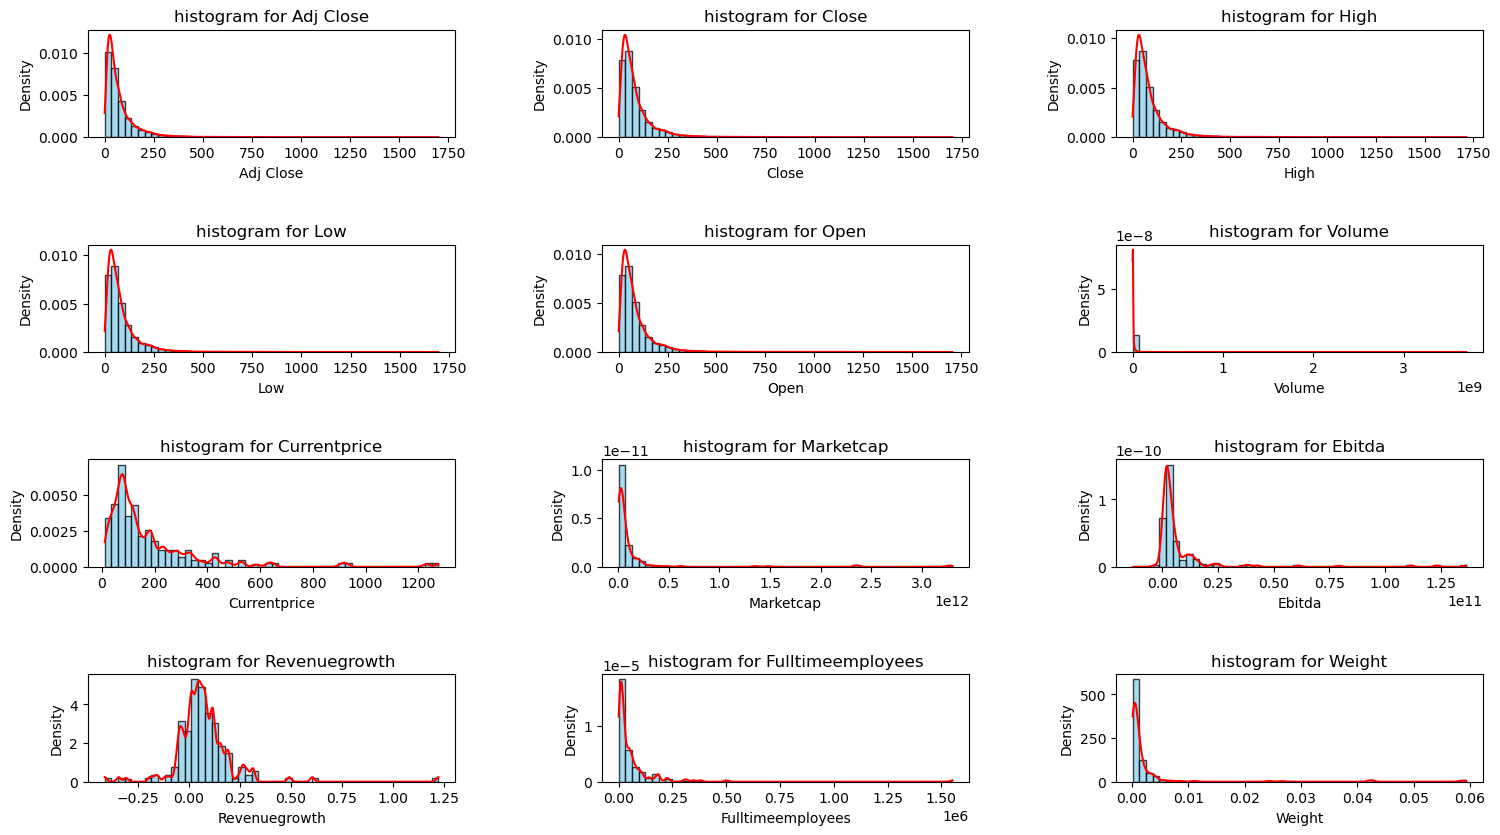

In [276]:
# create histogram with KDE plot for all teh numerical features

fig, ax = plt.subplots(4, 3, figsize=(18, 8))
plt.subplots_adjust(top = 0.99, bottom=0.05, hspace=1, wspace=0.4)
ax = ax.flatten()
for i,col in enumerate(Cont_features):
    kde = stats.gaussian_kde(stocks[col])
    x = np.linspace(stocks[col].min(), stocks[col].max(), 1000)
    ax[i].plot(x, kde(x), color='red')
    ax[i].hist(stocks[col], bins=50, density=True, alpha=0.75, color='skyblue', edgecolor='black')
    ax[i].set_title(f'histogram for {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Density')

In [229]:
result = pd.concat([stocks.isnull().sum(),round(stocks.isnull().mean()*100,2)],axis=1)
result = result.rename(index=str,columns={0:'total missing',1:'proportion'})
result.sort_values(by='total missing',ascending=False,inplace=True)
result

,total missing,proportion
Ebitda,44065,7.13
Fulltimeemployees,19025,3.08
State,14096,2.28
Revenuegrowth,3768,0.61
Date,0,0.00
Industry,0,0.00
Longbusinesssummary,0,0.00
Country,0,0.00
City,0,0.00
Marketcap,0,0.00


/var/folders/0_/skr2d259613gs33jbnv_ytn80000gn/T/ipykernel_96076/1239326231.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = stocks.corr()


Text(0.5, 1.0, 'Correlation Heatmap Including TARGET')

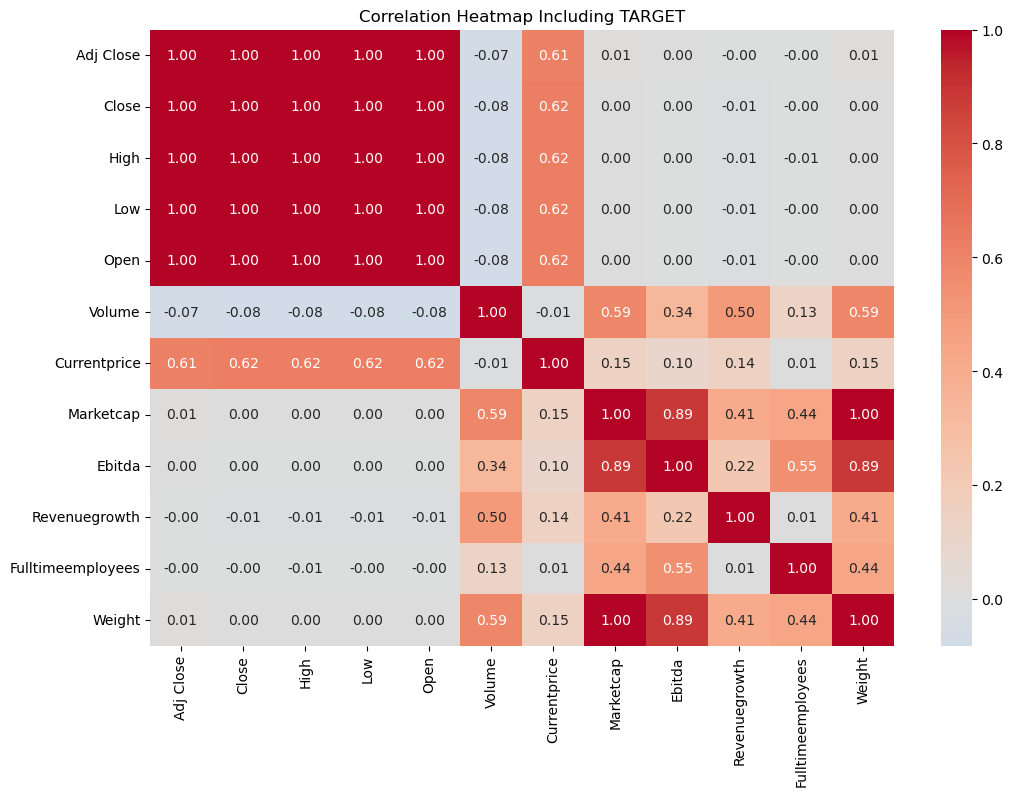

In [230]:
# correlations for selected features + TARGET
corr_matrix = stocks.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap Including TARGET")

In [231]:
missing_state = stocks[stocks['State'].isnull()].groupby('Symbol').size()
missing_state

Symbol
ALLE    2792
JCI     3768
TT      3768
WTW     3768
dtype: int64

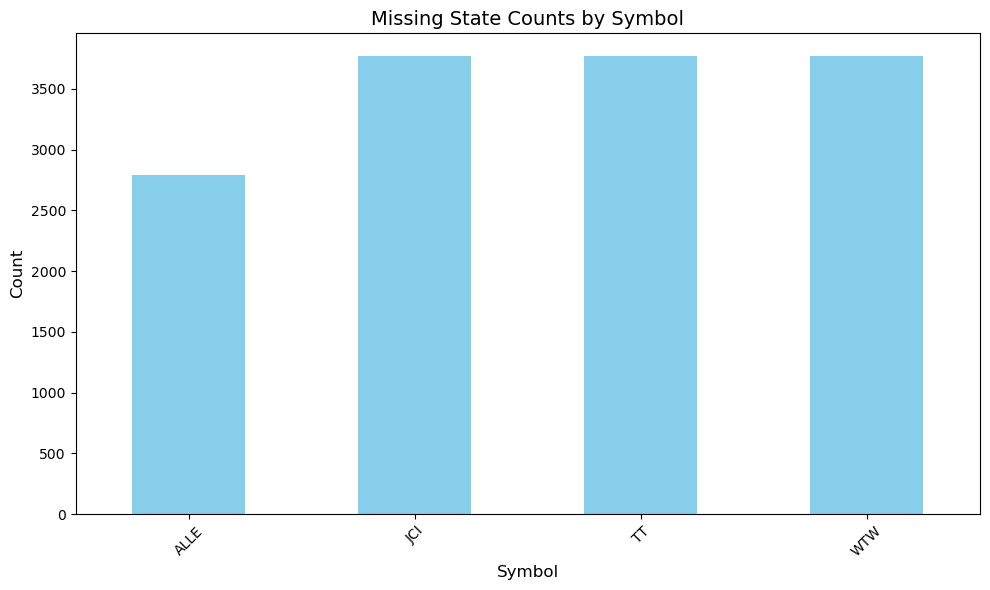

In [232]:
# Plot the missing_state dataset
plt.figure(figsize=(10, 6))
missing_state.plot(kind='bar', color='skyblue')
plt.title('Missing State Counts by Symbol', fontsize=14)
plt.xlabel('Symbol', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [233]:
# Impute missing data 
stocks['State'] = stocks['State'].fillna('Unknown')

In [234]:
missing_fulltimeemployees = stocks[stocks['Fulltimeemployees'].isnull()].groupby('Symbol').size()
missing_fulltimeemployees

Symbol
DHI     3768
FFIV    3768
RJF     3768
SBUX    3768
SOLV     185
V       3768
dtype: int64

In [235]:
stocks.loc[stocks['Symbol']=='DHI','Fulltimeemployees'] = 13500
stocks.loc[stocks['Symbol']=='FFIV','Fulltimeemployees'] = 6500
stocks.loc[stocks['Symbol']=='V','Fulltimeemployees'] = 31600
stocks.loc[stocks['Symbol']=='RJF','Fulltimeemployees'] = 23019
stocks.loc[stocks['Symbol']=='SBUX','Fulltimeemployees'] = 381000
stocks.loc[stocks['Symbol']=='SOLV','Fulltimeemployees'] = 22000


In [236]:
stocks[stocks['Revenuegrowth'].isnull()].groupby(stocks['Symbol']).size()

Symbol
WDC    3768
dtype: int64

In [237]:
stocks[stocks['Symbol']=='WDC']

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
603208,2010-01-04,WDC,36.334637,45.259998,45.799999,44.400002,44.400002,3118200.0,NMS,Western Digital Corporation,...,60.24,20825450496,2.134000e+09,NaN,San Jose,CA,United States,51000.0,"Western Digital Corporation develops, manufact...",0.000375
603209,2010-01-05,WDC,37.297993,46.459999,47.439999,45.049999,45.349998,7048900.0,NMS,Western Digital Corporation,...,60.24,20825450496,2.134000e+09,NaN,San Jose,CA,United States,51000.0,"Western Digital Corporation develops, manufact...",0.000375
603210,2010-01-06,WDC,37.330093,46.500000,46.900002,46.049999,46.540001,3996100.0,NMS,Western Digital Corporation,...,60.24,20825450496,2.134000e+09,NaN,San Jose,CA,United States,51000.0,"Western Digital Corporation develops, manufact...",0.000375
603211,2010-01-07,WDC,36.599556,45.590000,46.500000,45.080002,46.400002,3626500.0,NMS,Western Digital Corporation,...,60.24,20825450496,2.134000e+09,NaN,San Jose,CA,United States,51000.0,"Western Digital Corporation develops, manufact...",0.000375
603212,2010-01-08,WDC,36.784203,45.820000,45.840000,45.150002,45.490002,2521700.0,NMS,Western Digital Corporation,...,60.24,20825450496,2.134000e+09,NaN,San Jose,CA,United States,51000.0,"Western Digital Corporation develops, manufact...",0.000375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606971,2024-12-16,WDC,65.300003,65.300003,66.599998,64.050003,64.529999,5392900.0,NMS,Western Digital Corporation,...,60.24,20825450496,2.134000e+09,NaN,San Jose,CA,United States,51000.0,"Western Digital Corporation develops, manufact...",0.000375
606972,2024-12-17,WDC,64.639999,64.639999,66.010002,64.570000,65.199997,3918100.0,NMS,Western Digital Corporation,...,60.24,20825450496,2.134000e+09,NaN,San Jose,CA,United States,51000.0,"Western Digital Corporation develops, manufact...",0.000375
606973,2024-12-18,WDC,63.540001,63.540001,67.199997,63.099998,66.440002,5550300.0,NMS,Western Digital Corporation,...,60.24,20825450496,2.134000e+09,NaN,San Jose,CA,United States,51000.0,"Western Digital Corporation develops, manufact...",0.000375
606974,2024-12-19,WDC,59.619999,59.619999,62.310001,59.410000,61.919998,13538900.0,NMS,Western Digital Corporation,...,60.24,20825450496,2.134000e+09,NaN,San Jose,CA,United States,51000.0,"Western Digital Corporation develops, manufact...",0.000375


In [238]:
stocks['Revenuegrowth'] = stocks['Revenuegrowth'].fillna(stocks['Revenuegrowth'].median())
stocks[stocks['Revenuegrowth'].isnull()].groupby(stocks['Symbol']).size()

Series([], dtype: int64)

In [239]:
stocks[stocks['Ebitda'].isnull()].groupby(stocks['Symbol']).size()

Symbol
AMP    3768
AXP    3768
BK     3768
C      3768
COF    3768
DFS    3768
PNC    3768
RF     3768
RJF    3768
SYF    2617
USB    3768
WRB    3768
dtype: int64

In [240]:
symbols_with_null_revenuegrowth = stocks[stocks['Revenuegrowth'].isnull()]['Symbol'].unique()
ebitda_df = stocks[['Symbol','Volume', 'Marketcap', 'Revenuegrowth', 'Fulltimeemployees', 'Weight','Ebitda']]
ebitda_df = ebitda_df[ebitda_df['Symbol'].isin(symbols_with_null_revenuegrowth) == False]
ebitda_df.head()

,Symbol,Volume,Marketcap,Revenuegrowth,Fulltimeemployees,Weight,Ebitda
0,AOS,1104600.0,9964057600,-0.037,12000.0,0.000179,809100032.0
1,AOS,1207200.0,9964057600,-0.037,12000.0,0.000179,809100032.0
2,AOS,663000.0,9964057600,-0.037,12000.0,0.000179,809100032.0
3,AOS,564000.0,9964057600,-0.037,12000.0,0.000179,809100032.0
4,AOS,504600.0,9964057600,-0.037,12000.0,0.000179,809100032.0


In [241]:
ebitda_df.isnull().sum()

Symbol                   0
Volume                   0
Marketcap                0
Revenuegrowth            0
Fulltimeemployees        0
Weight                   0
Ebitda               44065
dtype: int64

In [242]:
features = ['Volume', 'Marketcap', 'Revenuegrowth', 'Fulltimeemployees', 'Weight']
target = ['Ebitda']
# Prepare the DataFrame for regression
ebitda_df = stocks[['Volume', 'Marketcap', 'Revenuegrowth', 'Fulltimeemployees', 'Weight','Ebitda']]
# df[df['Ebitda'].notnull()]
train = ebitda_df[ebitda_df['Ebitda'].notnull()]
test = ebitda_df[ebitda_df['Ebitda'].isnull()]

model = LinearRegression()
model.fit(train[features], train[target])

# Predict Ebitda for stocks with missing values
stocks.loc[stocks['Ebitda'].isnull(), 'Ebitda'] = model.predict(test[features])


In [243]:
result = pd.concat([stocks.isnull().sum(),round(stocks.isnull().mean()*100,2)],axis=1)
result = result.rename(index=str,columns={0:'total missing',1:'proportion'})
result.sort_values(by='total missing',ascending=False,inplace=True)
result

,total missing,proportion
Date,0,0.0
Industry,0,0.0
Longbusinesssummary,0,0.0
Fulltimeemployees,0,0.0
Country,0,0.0
State,0,0.0
City,0,0.0
Revenuegrowth,0,0.0
Ebitda,0,0.0
Marketcap,0,0.0


In [244]:
stocks['Date'] = pd.to_datetime(stocks['Date'])

stocks['Year'] = stocks['Date'].dt.year
stocks['Month'] = stocks['Date'].dt.month
stocks['Day'] = stocks['Date'].dt.day

In [245]:
stocks.drop(columns=['Date'], inplace=True)

In [246]:
stocks

,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,Longname,...,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight,Year,Month,Day
0,AOS,5.937266,7.435000,7.480000,7.261667,7.295000,1104600.0,NYQ,A.O. Smith Corporation,A. O. Smith Corporation,...,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179,2010,1,4
1,AOS,5.861404,7.340000,7.431667,7.308333,7.431667,1207200.0,NYQ,A.O. Smith Corporation,A. O. Smith Corporation,...,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179,2010,1,5
2,AOS,5.864068,7.343333,7.405000,7.301667,7.335000,663000.0,NYQ,A.O. Smith Corporation,A. O. Smith Corporation,...,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179,2010,1,6
3,AOS,5.881369,7.365000,7.425000,7.311667,7.356667,564000.0,NYQ,A.O. Smith Corporation,A. O. Smith Corporation,...,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179,2010,1,7
4,AOS,5.967879,7.473333,7.485000,7.311667,7.331667,504600.0,NYQ,A.O. Smith Corporation,A. O. Smith Corporation,...,-0.037,Milwaukee,WI,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179,2010,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617826,XYL,120.779999,120.779999,122.570000,120.000000,120.720001,1515900.0,NYQ,Xylem Inc.,Xylem Inc.,...,0.013,Washington,DC,United States,23000.0,"Xylem Inc., together with its subsidiaries, en...",0.000512,2024,12,16
617827,XYL,120.769997,120.769997,121.760002,119.730003,119.730003,2009200.0,NYQ,Xylem Inc.,Xylem Inc.,...,0.013,Washington,DC,United States,23000.0,"Xylem Inc., together with its subsidiaries, en...",0.000512,2024,12,17
617828,XYL,116.919998,116.919998,121.559998,116.879997,120.790001,1638500.0,NYQ,Xylem Inc.,Xylem Inc.,...,0.013,Washington,DC,United States,23000.0,"Xylem Inc., together with its subsidiaries, en...",0.000512,2024,12,18
617829,XYL,116.430000,116.430000,118.919998,116.129997,117.440002,1708000.0,NYQ,Xylem Inc.,Xylem Inc.,...,0.013,Washington,DC,United States,23000.0,"Xylem Inc., together with its subsidiaries, en...",0.000512,2024,12,19


In [247]:
stocks_enc = pd.concat([stocks, pd.get_dummies(stocks[Cat_features], drop_first=True)], axis=1)
stocks_enc.drop(columns=Cat_features, inplace=True)
stocks_enc.head()

,Adj Close,Close,High,Low,Open,Volume,Currentprice,Marketcap,Ebitda,Revenuegrowth,...,"Longbusinesssummary_Vertex Pharmaceuticals Incorporated, a biotechnology company, engages in developing and commercializing therapies for treating cystic fibrosis (CF). It markets TRIKAFTA/KAFTRIO for people with CF with at least one F508del mutation for 2 years of age or older; SYMDEKO/SYMKEVI for people with CF for 6 years of age or older; ORKAMBI for CF patients 1 year or older; and KALYDECO for the treatment of patients with 1 year or older who have CF with ivacaftor. The company's pipeline includes VX-522, a CFTR mRNA therapeutic designed to treat the underlying cause of CF, which is in Phase 1 clinical trial; VX-548, a non-opioid medicine for the treatment of acute and neuropathic pain which is in Phase 3 clinical trial; Exa-cel, for the treatment of sickle cell disease and transfusion-dependent beta thalassemia which is in Phase 2/3 clinical trial. In addition, it provides inaxaplin for the treatment of APOL1-mediated focal segmental glomerulosclerosis and co-morbidities, such as hypertension which is in single Phase 2/3; VX- 880 and VX-264, treatment for Type 1 Diabetes which is in Phase 1/2 clinical trial; VX-970, which is in Phase 2 clinical trial for the treatment of cancer; and VX-803 and VX-984 for treatment of cancer in Phase 1 clinical trial. Further, it sells the products to specialty pharmacy and specialty distributors in the United States, as well as retail pharmacies, hospitals, and clinics. Additionally, the company has collaborations with CRISPR Therapeutics AG.; Moderna, Inc.; Entrada Therapeutics, Inc.; Arbor Biotechnologies, Inc.; Mammoth Biosciences, Inc.; and Verve Therapeutics., as well as collaborations with Tevard Biosciences to develop novel tRNA-based therapies for duchenne muscular dystrophy. Vertex Pharmaceuticals Incorporated was founded in 1989 and is headquartered in Boston, Massachusetts.","Longbusinesssummary_Viatris Inc. operates as a healthcare company worldwide. The company operates in four segments: Developed Markets, Greater China, JANZ, and Emerging Markets. It offers prescription brand drugs, generic drugs, complex generic drugs, biosimilars, and active pharmaceutical ingredients (APIs). The company offers drugs in various therapeutic areas, including noncommunicable and infectious diseases; biosimilars in the areas of oncology, immunology, endocrinology, ophthalmology, and dermatology; and APIs for antibacterial, central nervous system agents, antihistamines/antiasthmatics, cardiovascular, antivirals, antidiabetics, antifungals, and proton pump inhibitor areas, as well as support services, such as diagnostic clinics, educational seminars, and digital tools to help patients better manage their health. It provides it medicines in the form of oral solid doses, injectables, complex dosage forms, and APIs to retail and pharmacy establishments, wholesalers and distributors, payers, insurers and governments, and institutions. The company distributes its products through pharmaceutical wholesalers/distributors, pharmaceutical retailers, institutional pharmacies, mail-order and e-commerce pharmacies, and specialty pharmacies. It sells its products under the Lyrica, Lipitor, Creon, Influvac, Wixela Inhub, EpiPen auto-injector, Fraxiparine, and Yupelri; Norvasc and Viagra; AMITIZA, Lipacreon, and Effexor; and Celebrex and ARV names, as well as glargine and SEMGLEE names. The company has collaboration and licensing agreements with Revance Therapeutics, Inc.; and Momenta Pharmaceuticals, Inc. Viatris Inc. was founded in 1961 and is headquartered in Canonsburg, Pennsylvania.","Longbusinesssummary_Visa Inc. operates as a payment technology company in the United States and internationally. The company operates VisaNet, a transaction processing network that enables authorization, clearing, and settlement of payment transactions. It also offers credit, debit, and prepaid card products; tap to pay, tokenization, an

In [253]:
# Normalize the continuous variables
scaler = StandardScaler()
stocks_enc[Cont_features] = scaler.fit_transform(stocks_enc[Cont_features])
stocks_enc


,Adj Close,Close,High,Low,Open,Volume,Currentprice,Marketcap,Ebitda,Revenuegrowth,...,"Longbusinesssummary_Vertex Pharmaceuticals Incorporated, a biotechnology company, engages in developing and commercializing therapies for treating cystic fibrosis (CF). It markets TRIKAFTA/KAFTRIO for people with CF with at least one F508del mutation for 2 years of age or older; SYMDEKO/SYMKEVI for people with CF for 6 years of age or older; ORKAMBI for CF patients 1 year or older; and KALYDECO for the treatment of patients with 1 year or older who have CF with ivacaftor. The company's pipeline includes VX-522, a CFTR mRNA therapeutic designed to treat the underlying cause of CF, which is in Phase 1 clinical trial; VX-548, a non-opioid medicine for the treatment of acute and neuropathic pain which is in Phase 3 clinical trial; Exa-cel, for the treatment of sickle cell disease and transfusion-dependent beta thalassemia which is in Phase 2/3 clinical trial. In addition, it provides inaxaplin for the treatment of APOL1-mediated focal segmental glomerulosclerosis and co-morbidities, such as hypertension which is in single Phase 2/3; VX- 880 and VX-264, treatment for Type 1 Diabetes which is in Phase 1/2 clinical trial; VX-970, which is in Phase 2 clinical trial for the treatment of cancer; and VX-803 and VX-984 for treatment of cancer in Phase 1 clinical trial. Further, it sells the products to specialty pharmacy and specialty distributors in the United States, as well as retail pharmacies, hospitals, and clinics. Additionally, the company has collaborations with CRISPR Therapeutics AG.; Moderna, Inc.; Entrada Therapeutics, Inc.; Arbor Biotechnologies, Inc.; Mammoth Biosciences, Inc.; and Verve Therapeutics., as well as collaborations with Tevard Biosciences to develop novel tRNA-based therapies for duchenne muscular dystrophy. Vertex Pharmaceuticals Incorporated was founded in 1989 and is headquartered in Boston, Massachusetts.","Longbusinesssummary_Viatris Inc. operates as a healthcare company worldwide. The company operates in four segments: Developed Markets, Greater China, JANZ, and Emerging Markets. It offers prescription brand drugs, generic drugs, complex generic drugs, biosimilars, and active pharmaceutical ingredients (APIs). The company offers drugs in various therapeutic areas, including noncommunicable and infectious diseases; biosimilars in the areas of oncology, immunology, endocrinology, ophthalmology, and dermatology; and APIs for antibacterial, central nervous system agents, antihistamines/antiasthmatics, cardiovascular, antivirals, antidiabetics, antifungals, and proton pump inhibitor areas, as well as support services, such as diagnostic clinics, educational seminars, and digital tools to help patients better manage their health. It provides it medicines in the form of oral solid doses, injectables, complex dosage forms, and APIs to retail and pharmacy establishments, wholesalers and distributors, payers, insurers and governments, and institutions. The company distributes its products through pharmaceutical wholesalers/distributors, pharmaceutical retailers, institutional pharmacies, mail-order and e-commerce pharmacies, and specialty pharmacies. It sells its products under the Lyrica, Lipitor, Creon, Influvac, Wixela Inhub, EpiPen auto-injector, Fraxiparine, and Yupelri; Norvasc and Viagra; AMITIZA, Lipacreon, and Effexor; and Celebrex and ARV names, as well as glargine and SEMGLEE names. The company has collaboration and licensing agreements with Revance Therapeutics, Inc.; and Momenta Pharmaceuticals, Inc. Viatris Inc. was founded in 1961 and is headquartered in Canonsburg, Pennsylvania.","Longbusinesssummary_Visa Inc. operates as a payment technology company in the United States and internationally. The company operates VisaNet, a transaction processing network that enables authorization, clearing, and settlement of payment transactions. It also offers credit, debit, and prepaid card products; tap to pay, tokenization, an

In [280]:
stocks_enc['Revenuegrowth'] = np.log1p(stocks_enc['Revenuegrowth'])
stocks_enc['Ebitda'] = np.log1p(stocks_enc['Ebitda'])

/opt/anaconda3/envs/env_tf/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: array must not contain infs or NaNs

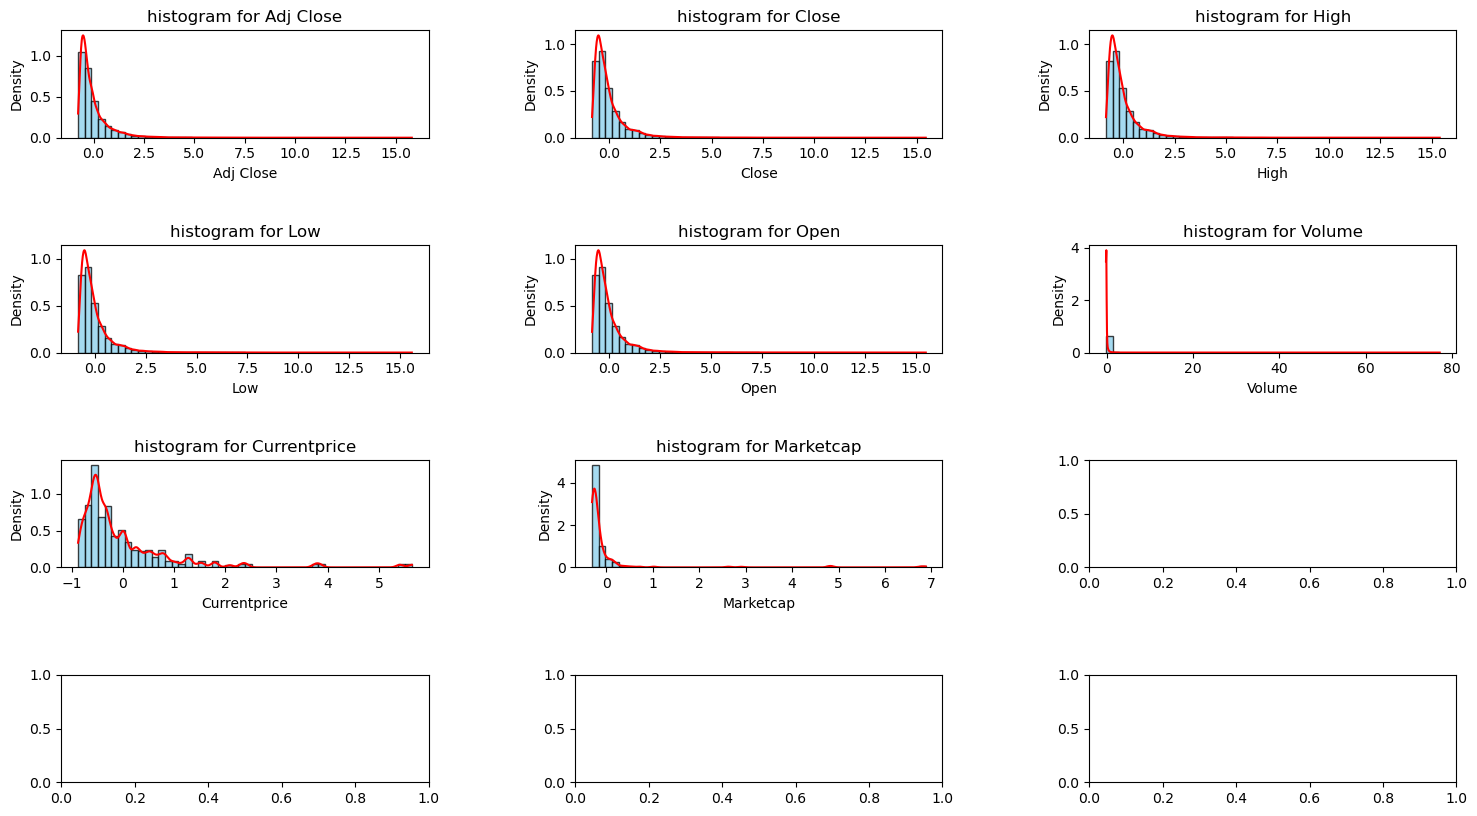

In [281]:

fig, ax = plt.subplots(4, 3, figsize=(18, 8))
plt.subplots_adjust(top = 0.99, bottom=0.05, hspace=1, wspace=0.4)
ax = ax.flatten()
for i,col in enumerate(Cont_features):
    kde = stats.gaussian_kde(stocks_enc[col])
    x = np.linspace(stocks_enc[col].min(), stocks_enc[col].max(), 1000)
    ax[i].plot(x, kde(x), color='red')
    ax[i].hist(stocks_enc[col], bins=50, density=True, alpha=0.75, color='skyblue', edgecolor='black')
    ax[i].set_title(f'histogram for {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Density')

In [255]:
pca = PCA()
XD = pca.fit(stocks_enc)
cum_sum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cum_sum >= 0.95) + 1
print(f"Number of components to explain 95% variance: {d}")

Number of components to explain 95% variance: 17


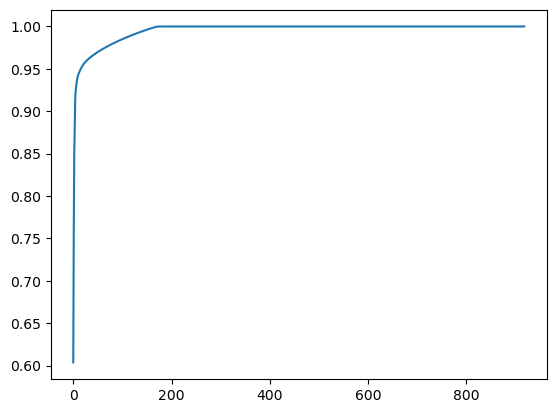

In [256]:
plt.plot(cum_sum)

In [257]:
# Convert X_scaled to a DataFrame to use the drop method

pca = PCA(n_components=d)
stocks_pca = pca.fit_transform(stocks_enc.reset_index(drop=True))
stocks_pca = pd.DataFrame(stocks_pca)
stocks_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-11.687757,-7.344103,-5.590824,0.097130,-0.981636,-0.302787,-0.159238,-0.548766,0.256818,0.335816,-0.486059,0.772652,-0.045122,0.028606,-0.181760,-0.167225,0.092032
1,-10.687759,-7.342395,-5.590003,0.096669,-0.980837,-0.301829,-0.158748,-0.549930,0.256054,0.336716,-0.485860,0.772603,-0.045212,0.028746,-0.181977,-0.166968,0.091889
2,-9.687760,-7.340659,-5.589135,0.096119,-0.984659,-0.306573,-0.161421,-0.543455,0.259709,0.332756,-0.486742,0.772787,-0.044828,0.028080,-0.180848,-0.168024,0.092559
3,-8.687762,-7.338775,-5.588282,0.096218,-0.985348,-0.307402,-0.161855,-0.542404,0.260373,0.332003,-0.486897,0.772833,-0.044754,0.027952,-0.180650,-0.168211,0.092669
4,-7.687764,-7.336744,-5.587416,0.096834,-0.985796,-0.307892,-0.162043,-0.541967,0.260810,0.331424,-0.487001,0.772883,-0.044693,0.027861,-0.180541,-0.168355,0.092732


In [258]:
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=0)
    kmeans.fit(data)
    return kmeans, kmeans.labels_, kmeans.inertia_

In [259]:
stocks_enc.shape

(617831, 919)

Number of clusters: 2, Inertia: 39147828.27401473, Silhouette Score: 0.39067156171401307
Number of clusters: 3, Inertia: 32515657.020201564, Silhouette Score: 0.2611107267887929
Number of clusters: 4, Inertia: 28976326.52413287, Silhouette Score: 0.2548735324375069
Number of clusters: 5, Inertia: 26153148.87913797, Silhouette Score: 0.22784346619729046


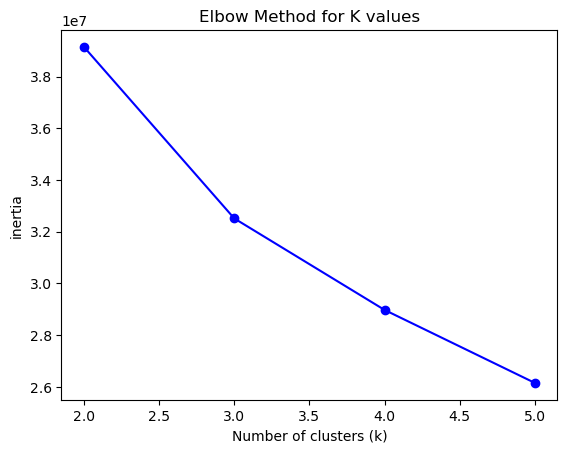

In [261]:
inertias = []
knn_labels = []
train_eval = stocks_pca.copy()

# Perform KMeans clustering for different values of k
for n_clusters in range(2, 6):
    kmeans, labels, inertia = kmeans_clustering(stocks_pca, n_clusters)
    inertias.append(inertia)
    knn_labels.append(labels)
    # Calculate silhouette score
    silhouette_avg = silhouette_score(stocks_pca, labels)
    print(f'Number of clusters: {n_clusters}, Inertia: {inertia}, Silhouette Score: {silhouette_avg}')
    
    # Add cluster labels to the DataFrame
    train_eval[f'cluster_{n_clusters}'] = labels

# Plot the elbow curve
plt.plot(range(2, 6), inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('inertia')
plt.title('Elbow Method for K values')
plt.show()

In [262]:
# Perform KMeans clustering for different values of k
for n_clusters in range(6, 10):
    kmeans, labels, inertia = kmeans_clustering(stocks_pca, n_clusters)
    inertias.append(inertia)
    knn_labels.append(labels)
    # Calculate silhouette score
    silhouette_avg = silhouette_score(stocks_pca, labels)
    print(f'Number of clusters: {n_clusters}, Inertia: {inertia}, Silhouette Score: {silhouette_avg}')
    
    # Add cluster labels to the DataFrame
    train_eval[f'cluster_{n_clusters}'] = labels

Number of clusters: 6, Inertia: 23683460.806116134, Silhouette Score: 0.211734235397641
Number of clusters: 7, Inertia: 22541028.523953862, Silhouette Score: 0.2010808548979029
Number of clusters: 8, Inertia: 21271731.767964404, Silhouette Score: 0.19777016663518257
Number of clusters: 9, Inertia: 20238294.042165086, Silhouette Score: 0.20105978219271872


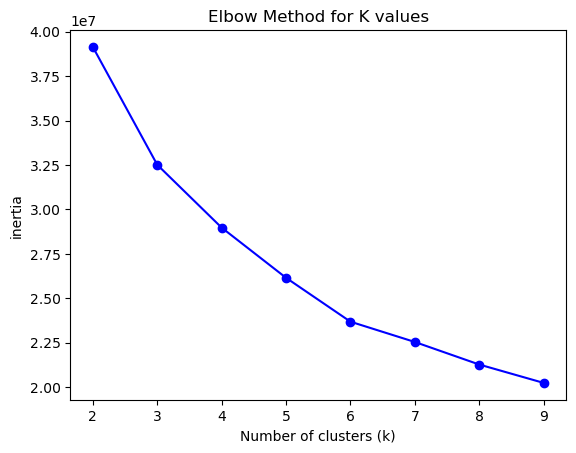

In [263]:
# Plot the elbow curve
plt.plot(range(2, 10), inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('inertia')
plt.title('Elbow Method for K values')
plt.show()

In [ ]:
stocks

KMeans(n_clusters=9, random_state=0)